# KHÁM PHÁ DỮ LIỆU

Dữ liệu chứa trong file `tips.csv` chứa thông tin tiền tip của khách hàng tại một nhà hàng. Dữ liệu có các thông tin sau:

- `total_bill`: tổng hoá đơn (USD)
- `tip`: tiền tip/ tiền boa (USD)
- `sex`: giới tính người thanh toán hóa đơn
- `smoker`: có hút thuốc hay không
- `day`: ngày trong tuần
- `time`: thời gian dùng bữa(buổi sáng, buổi trưa, buổi tối)
- `size`: số lượng người tham gia

Bạn hãy thực hiện thống kê mô tả để tìm hiểu về hành vi tip của khách hàng tại nhà hàng

## HIỂU DỮ LIỆU

1. Đọc dữ liệu
2. Xoá cột `Unnamed: 0`
3. Cho biết dữ liệu có bao nhiêu dòng, bao nhiêu thuộc tính.
4. Trong các thuộc tính, thuộc tính nào là thuộc tính phân loại, thuộc tính nào là thuộc tính định lượng
5. Có bao nhiêu nam, bao nhiêu nữ. Tỷ lệ bao nhiêu?
6. Có bao nhiêu người hút thuốc. Tỷ lệ bao nhiêu?
7. Ngày nào trong tuần khách hàng hay đến dùng bữa nhất. Tỷ lệ bao nhiêu?
8. Nhà hàng phục vụ bữa ăn nào nhiều nhất (Breakfast, Lunch, Dinner)?
9. Nhóm khách hàng dùng bữa tại nhà hàng nhiều nhất là bao nhiêu người?
10. Trung bình trong một bữa ăn nhà hàng phục vụ mấy khách?

In [1]:
import pandas as pd
import numpy as np
#Câu 1
US_BABY = pd.read_csv('C:\\Users\\Hung Anh\\Downloads\\BtthTKMTVUD\\TKMT_lab_03\\TKMT_lab_03\\data\\tips.csv')



In [2]:
print(US_BABY)

     Unnamed: 0  total_bill   tip     sex smoker   day    time  size
0             0       16.99  1.01  Female     No   Sun  Dinner     2
1             1       10.34  1.66    Male     No   Sun  Dinner     3
2             2       21.01  3.50    Male     No   Sun  Dinner     3
3             3       23.68  3.31    Male     No   Sun  Dinner     2
4             4       24.59  3.61  Female     No   Sun  Dinner     4
..          ...         ...   ...     ...    ...   ...     ...   ...
239         239       29.03  5.92    Male     No   Sat  Dinner     3
240         240       27.18  2.00  Female    Yes   Sat  Dinner     2
241         241       22.67  2.00    Male    Yes   Sat  Dinner     2
242         242       17.82  1.75    Male     No   Sat  Dinner     2
243         243       18.78  3.00  Female     No  Thur  Dinner     2

[244 rows x 8 columns]


In [3]:
#Câu 2
US_BABY.isna().sum()
US_BABY = US_BABY.drop(US_BABY.columns[0],axis=1)
US_BABY.isna().sum()

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64

In [103]:
# câu 3
US_BABY.shape

(244, 7)

In [104]:
# câu 4
#Thuộc tính phân loại
print(US_BABY.dtypes)
#thuộc tính định lượng
print(US_BABY.mean)

total_bill    float64
tip           float64
sex            object
smoker         object
day            object
time           object
size            int64
dtype: object
<bound method NDFrame._add_numeric_operations.<locals>.mean of      total_bill   tip     sex smoker   day    time  size
0         16.99  1.01  Female     No   Sun  Dinner     2
1         10.34  1.66    Male     No   Sun  Dinner     3
2         21.01  3.50    Male     No   Sun  Dinner     3
3         23.68  3.31    Male     No   Sun  Dinner     2
4         24.59  3.61  Female     No   Sun  Dinner     4
..          ...   ...     ...    ...   ...     ...   ...
239       29.03  5.92    Male     No   Sat  Dinner     3
240       27.18  2.00  Female    Yes   Sat  Dinner     2
241       22.67  2.00    Male    Yes   Sat  Dinner     2
242       17.82  1.75    Male     No   Sat  Dinner     2
243       18.78  3.00  Female     No  Thur  Dinner     2

[244 rows x 7 columns]>


In [105]:
#câu 5
#xác định ra số lương nam
summale = sum(US_BABY['sex'] == 'Male')
sumfemale = sum(US_BABY['sex'] == 'Female')
ratio_male = summale/(summale+sumfemale) * 100;
print(str(ratio_male) + "%")
ratio_female = sumfemale/(summale+sumfemale) * 100;
print(str(ratio_female) + "%")

64.34426229508196%
35.65573770491803%


In [97]:
#Câu 6
# US_BABY.groupby(['smoker']).size()
# sum_smoke = sum(US_BABY['smoker'] == 'Yes')
# print(sum_smoke)
nghien = US_BABY.groupby(['smoker']).size().values[1]
khongnghien = US_BABY.groupby(['smoker']).size().values[0]
print("Tỉ lệ người hút thuốc: " + str(nghien/(nghien+khongnghien) *100) +"%")
print("Tỉ lệ người không hút thuốc: " + str(khongnghien/(nghien+khongnghien) *100) +"%")

smoker
No     151
Yes     93
dtype: int64

In [106]:
#Câu 7
maxvaules = US_BABY['day'].value_counts()
maxindex = maxvaules.index
print("So luong suat an nhieu nhat trong tuan la:" + str(maxindex[0]) + ", ti le cac tuan la: " + str(maxvaules[0]/US_BABY['day'].count() *100) + "%")

So luong suat an nhieu nhat trong tuan la:Sat, ti le cac tuan la: 35.65573770491803%


In [114]:
#cau 8
timetoeat = US_BABY['time'].value_counts()
tte_index = timetoeat.index
print(str(tte_index[0])+" " + str(timetoeat[0]))


Dinner 176


In [24]:
#Nhóm khách hàng dùng bữa tại nhà hàng nhiều nhất là bao nhiêu người?
much = US_BABY['size'].value_counts()
print(much)
muchindex = much.index
print("Nhóm khách hàng dùng bữa tại nhà hàng nhiều nhất: "+str(muchindex[0]))

2    156
3     38
4     37
5      5
1      4
6      4
Name: size, dtype: int64
Nhóm khách hàng dùng bữa tại nhà hàng nhiều nhất2


In [21]:
# Lấy trung bình số lượng khách ăn trong buổi sáng
avg_lunch = US_BABY[US_BABY['time'] == 'Lunch']['size'].mean()
print('Trung bình số lượng khách ăn trong buổi sáng:', avg_lunch)

# Lấy trung bình số lượng khách ăn trong buổi tối
avg_dinner = US_BABY[US_BABY['time'] == 'Dinner']['size'].mean()
print('Trung bình số lượng khách ăn trong buổi tối:', avg_dinner)

Trung bình số lượng khách ăn trong buổi sáng: 2.411764705882353
Trung bình số lượng khách ăn trong buổi tối: 2.6306818181818183


## YẾU TỐ ẢNH HƯỞNG ĐẾN TIỀN TIP

Trong phần này, chúng ta thử tìm hiểu về tiền tip tại nhà hàng và các yếu tố có thể ảnh hưởng đến nó

1. Tỷ lệ nhận được tiền tip của nhà hàng là bao nhiêu?
2. Tỷ lệ tiền tip trên tổng hóa đơn là bao nhiêu?
3. Giữa nam và nữ ai tip nhiều tiền hơn, ai tip thường xuyên hơn?
4. Giữa người hút thuốc và người không hút thuốc ai tip nhiều tiền hơn, ai tip thường xuyên hơn?
5. Thống kê tổng số tiền tip nhận được theo ngày.

In [33]:
# 1. Tỷ lệ nhận được tiền tip của nhà hàng là bao nhiêu?
# Tính tỷ lệ nhận tiền tip của nhà hàng

tip_percentage = US_BABY['tip'].mean() / US_BABY['total_bill'].mean() * 100
print('Tỷ lệ nhận tiền tip của nhà hàng là:', tip_percentage, '%')

Tỷ lệ nhận tiền tip của nhà hàng là: 15.153580224410026 %


In [10]:
#  2. Tỷ lệ tiền tip trên tổng hóa đơn là bao nhiêu?
cout_tip = len(US_BABY[US_BABY['tip'] > 0])
tip_percentage = cout_tip/ len(US_BABY['total_bill']) * 100
print('Tỷ lệ tiền tip trên tổng hóa đơn là:', tip_percentage, '%')

244
Tỷ lệ tiền tip trên tổng hóa đơn là: 100.0 %


In [36]:
# 3. Giữa nam và nữ ai tip nhiều tiền hơn, ai tip thường xuyên hơn?
avg_tip_by_sex = US_BABY.groupby('sex')['tip'].mean()
print(avg_tip_by_sex)

sex
Female    2.833448
Male      3.089618
Name: tip, dtype: float64


In [48]:
# 4. Giữa người hút thuốc và người không hút thuốc ai tip nhiều tiền hơn, ai tip thường xuyên hơn?
tip_by_smoker = US_BABY.groupby('smoker')['tip'].mean()
print(tip_by_smoker)

smoker
No     2.991854
Yes    3.008710
Name: tip, dtype: float64


In [51]:
# 5. Thống kê tổng số tiền tip nhận được theo ngày.\
sum_tip_in_day = US_BABY.groupby('day')['tip'].sum()
print(sum_tip_in_day)

day
Fri      51.96
Sat     260.40
Sun     247.39
Thur    171.83
Name: tip, dtype: float64


# TRỰC QUAN DỮ LIỆU

Để dễ hình dung, bạn hãy trực quan với một số câu hỏi sau đây:

1. Vẽ đồ thị thể hiện tổng tiền tip theo ngày
2. Vẽ đồ thị thể hiện tổng tiền tip theo bữa ăn (time)
3. Vẽ đồ thị histogram của tổng hoá đơn
4. Vẽ đồ thị boxplot của tổng hoá đơn
5. Vẽ đồ thị để kiểm tra sự liên quan giữa tổng hoá đơn và tiền tip.
6. So sánh số tiền mà khách hàng đã chi giữa các ngày trong tuần.

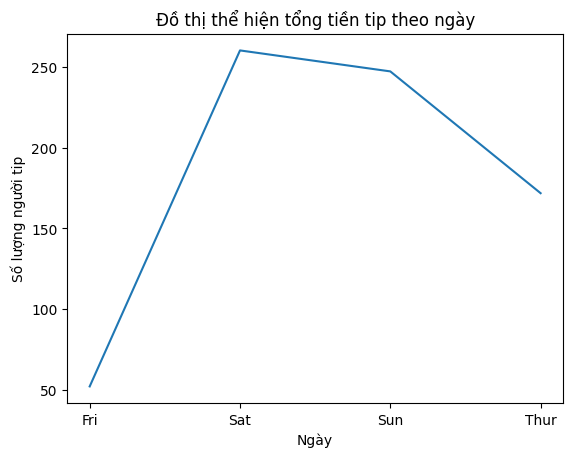

In [12]:
import matplotlib.pyplot as plt
sum_tip_in_day = US_BABY.groupby('day')['tip'].sum()
plt.plot(sum_tip_in_day.index, sum_tip_in_day.values)
plt.xlabel('Ngày')
plt.ylabel('Số lượng người tip')
plt.title('Đồ thị thể hiện tổng tiền tip theo ngày')
plt.show()

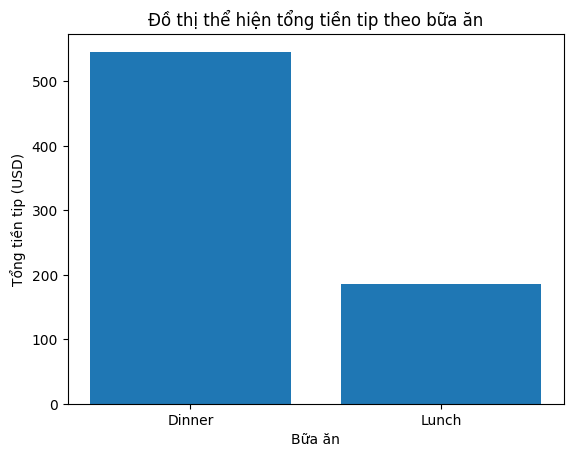

In [11]:
import matplotlib.pyplot as plt

sum_tip_in_time = US_BABY.groupby('time')['tip'].sum()

plt.bar(sum_tip_in_time.index, sum_tip_in_time.values)
plt.xlabel('Bữa ăn')
plt.ylabel('Tổng tiền tip (USD)')
plt.title('Đồ thị thể hiện tổng tiền tip theo bữa ăn')
plt.show()

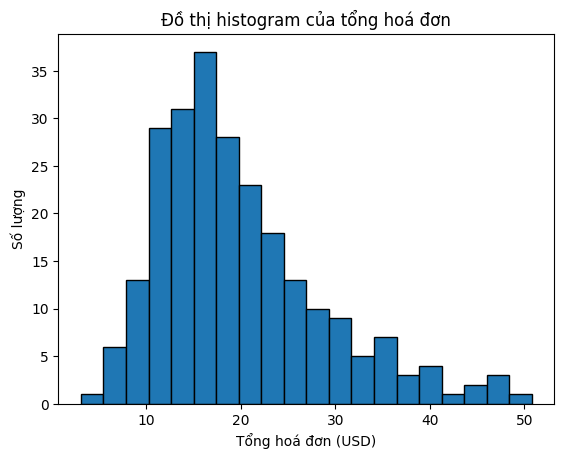

In [7]:
# 3. Vẽ đồ thị histogram của tổng hoá đơn
plt.hist(US_BABY['total_bill'], bins=20, edgecolor='black')
plt.xlabel('Tổng hoá đơn (USD)')
plt.ylabel('Số lượng')
plt.title('Đồ thị histogram của tổng hoá đơn')
plt.show()

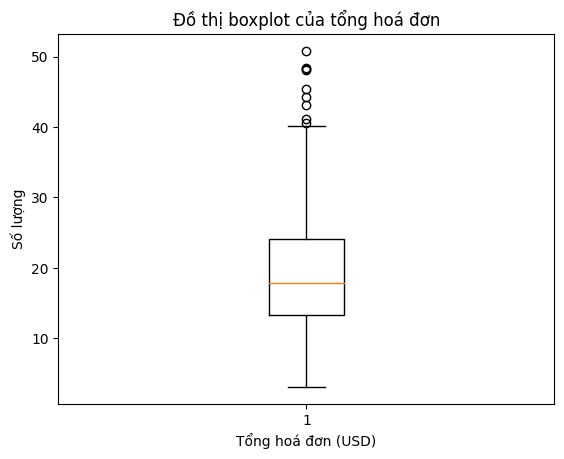

In [8]:
#4. Vẽ đồ thị boxplot của tổng hoá đơn
plt.boxplot(US_BABY['total_bill'])
plt.xlabel('Tổng hoá đơn (USD)')
plt.ylabel('Số lượng')
plt.title('Đồ thị boxplot của tổng hoá đơn')
plt.show()

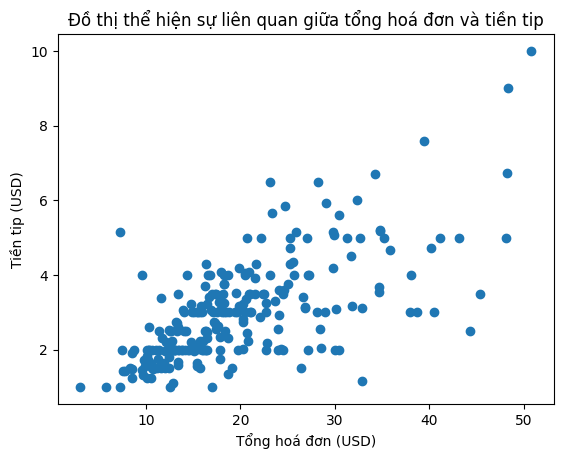

In [9]:
# 5. Vẽ đồ thị để kiểm tra sự liên quan giữa tổng hoá đơn và tiền tip.
import matplotlib.pyplot as plt

x = US_BABY['total_bill']
y = US_BABY['tip']

plt.scatter(x, y)
plt.xlabel('Tổng hoá đơn (USD)')
plt.ylabel('Tiền tip (USD)')
plt.title('Đồ thị thể hiện sự liên quan giữa tổng hoá đơn và tiền tip')
plt.show()

In [ ]:
#Câu 6. So sánh số tiền mà khách hàng đã chi giữa các ngày trong tuần.
import matplotlib.pyplot as plt

day = tips.groupby(['day']).sum()
total_bill = day['total_bill']
tip = day['tip']
pay = total_bill + tip

plt.style.use("ggplot")
plt.subplots(figsize=(12, 5))
plt.bar(pay.index, pay, 0.5, color = 'green')

plt.show()

## Với Matplotlib

Bạn hãy trực quan với thư viện matplotlib

## Với Seaborn

Bạn hãy tìm hiểu và trực quan với thư viện seaborn